<a href="https://colab.research.google.com/github/vitor-marinho-fjp/bioeconomia/blob/main/land_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

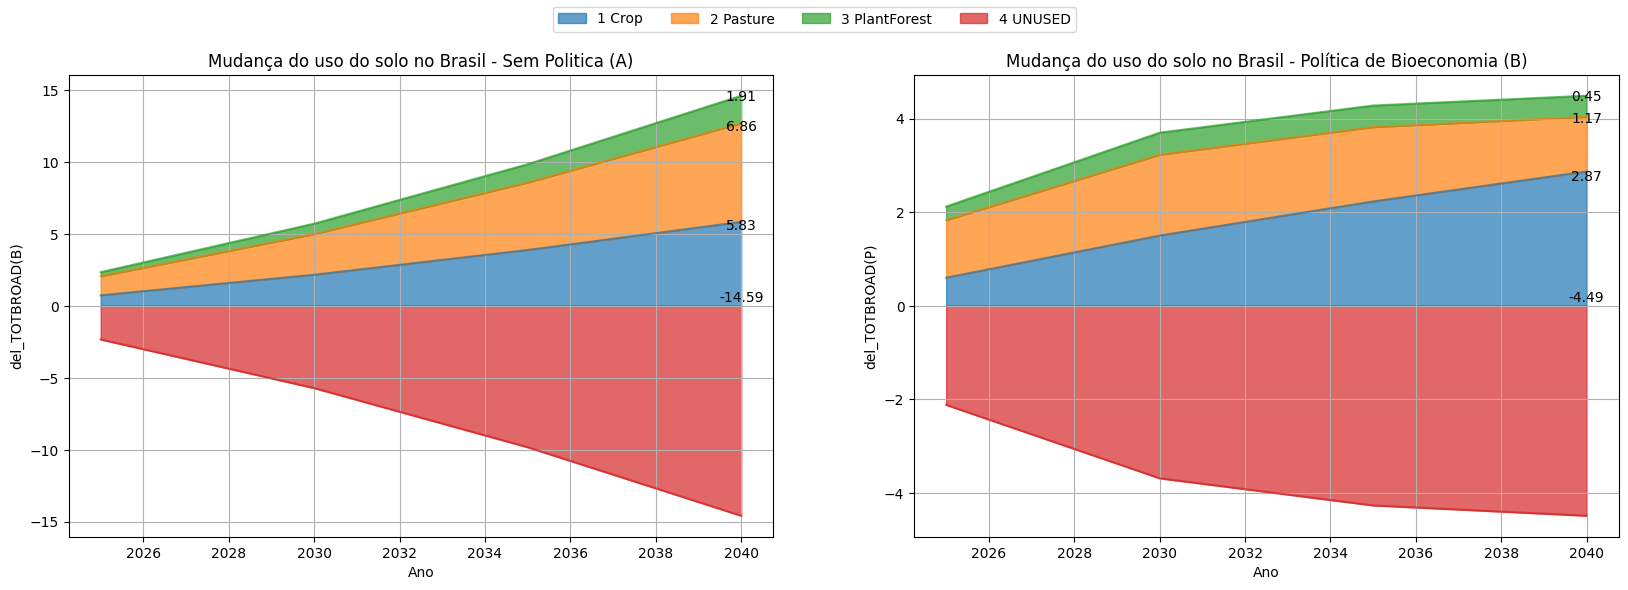

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Preparando os dados para os gráficos de área
# ---------------------------------------------
# Dados representando mudanças no uso do solo no Brasil sob dois cenários:
# "Sem Política" e "Política de Bioeconomia".

# Dados do cenário "Sem Política"
data_b = {
    "Year": [2025, 2030, 2035, 2040],
    "1 Crop": [0.73, 2.16, 3.88, 5.83],
    "2 Pasture": [1.33, 2.83, 4.69, 6.86],
    "3 PlantForest": [0.28, 0.72, 1.27, 1.91],
    "4 UNUSED": [-2.34, -5.72, -9.83, -14.59]
}

# Dados do cenário "Política de Bioeconomia"
data_p = {
    "Year": [2025, 2030, 2035, 2040],
    "1 Crop": [0.60, 1.50, 2.23, 2.87],
    "2 Pasture": [1.23, 1.73, 1.59, 1.17],
    "3 PlantForest": [0.29, 0.47, 0.46, 0.45],
    "4 UNUSED": [-2.12, -3.69, -4.27, -4.49]
}

# Convertendo os dados em DataFrames
df_area_chart_b = pd.DataFrame(data_b).set_index('Year')
df_area_chart_p = pd.DataFrame(data_p).set_index('Year')

# Definindo as cores para os gráficos de área
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Função para anotar os valores reais em 2040
def annotate_values_2040(ax, df):
    year_2040 = df.loc[2040]
    cumulative_heights = year_2040.cumsum()
    cumulative_height = 0

    for col in df.columns:
        category_value = year_2040[col]
        cumulative_height += category_value
        y_position = cumulative_height - (category_value / 25)
        ax.text(2040, y_position, f'{category_value:.2f}', ha='center', va='center', color='black')

# Criando e plotando os gráficos de área
# --------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Gráfico de área para o cenário "Sem Política"
df_area_chart_b.plot.area(ax=axes[0], stacked=True, alpha=0.7, color=cores)
annotate_values_2040(axes[0], df_area_chart_b)
axes[0].set_title('Mudança do uso do solo no Brasil - Sem Politica (A)')
axes[0].set_ylabel('del_TOTBROAD(B)')
axes[0].set_xlabel('Ano')
axes[0].grid(True)

# Gráfico de área para o cenário "Política de Bioeconomia"
df_area_chart_p.plot.area(ax=axes[1], stacked=True, alpha=0.7, color=cores)
annotate_values_2040(axes[1], df_area_chart_p)
axes[1].set_title('Mudança do uso do solo no Brasil - Política de Bioeconomia (B)')
axes[1].set_ylabel('del_TOTBROAD(P)')
axes[1].set_xlabel('Ano')
axes[1].grid(True)

# Ajustando a legenda
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(df_area_chart_b.columns))

# Removendo legendas individuais dos gráficos
axes[0].get_legend().remove()
axes[1].get_legend().remove()

# Exibindo os gráficos
plt.show()
